In [3]:
from clustering import ClusterObject
import numpy as np

path = r"/Users/arshianayebnazar/Documents/GitHub/Face-Distortion-Fixer/data/crop_part1"
# change the working directory to the path where the images are located
os.chdir(path)

data = np.load('/Users/arshianayebnazar/Documents/GitHub/Face-Distortion-Fixer/data/featurevectors/original_features.npy',allow_pickle='TRUE').item()
cluster = ClusterObject(data)

cluster.addFeatureVector('stupidface.jpg', 16, 0)
groups = cluster.getGroups(70)

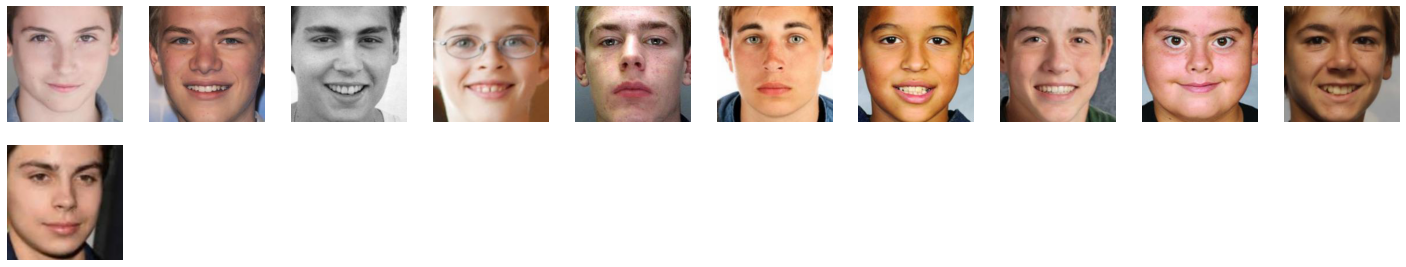

In [4]:
def findFile(groups, filename):
    for i in groups.keys():
        for j in groups[i]:
            if j == filename:
                return i

# key = findFile(groups, 'stupidface.jpg')
cluster.view_cluster(groups)

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from keras.preprocessing.image import load_img 

path = r"/Users/arshianayebnazar/Documents/GitHub/Face-Distortion-Fixer/data/crop_part1"
# change the working directory to the path where the images are located
os.chdir(path)

files = []
for i in data.keys():
    if i != 'stupidface.jpg':
        files.append(np.array(load_img(i, target_size=(64,64))).reshape(1,64,64,3))
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
path = r"/Users/arshianayebnazar/Documents/GitHub/Face-Distortion-Fixer/data"
# change the working directory to the path where the images are located
os.chdir(path)

binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

for epoch in range(20):
    for index, real in enumerate(tqdm(files)):
        batch_size = real.shape[0]
        vectors = tf.random.normal(shape = (batch_size, latent_dim))
        fake = generator(vectors)
        
        if index % 100 == 0:
            Image = keras.preprocessing.image.img_to_array(fake[0])
#             path = (f"My_Images/images{epoch}_{index}.png")
#             cv2.imwrite(path, image)
            keras.preprocessing.image.save_img(f"{epoch}_{index}.png", Image)
            
        with tf.GradientTape() as disc_tape:
            real_loss = binary_cross_entropy(tf.ones((batch_size, 1)), discriminator(real))
            fake_loss = binary_cross_entropy(tf.zeros(batch_size, 1), discriminator(fake))
            total_disc_loss = (real_loss + fake_loss)/2
            
        grads = disc_tape.gradient(total_disc_loss, discriminator.trainable_weights)
        optimizer.apply_gradients(zip(grads, discriminator.trainable_weights))
        
        with tf.GradientTape() as gen_tape:
            fake = generator(vectors)
            generator_output = discriminator(fake)
            generator_loss = binary_cross_entropy(tf.ones(batch_size, 1), generator_output)
            
        grads = gen_tape.gradient(generator_loss, generator.trainable_weights)
        optimizer.apply_gradients(zip(grads, generator.trainable_weights))

 65%|██████▌   | 6390/9780 [3:52:02<24:33,  2.30it/s]

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
PIC_DIR = './drive/img_align_celeba/'
path = r"/Users/arshianayebnazar/Documents/GitHub/Face-Distortion-Fixer/data/crop_part1"
# change the working directory to the path where the images are located
os.chdir(path)

files = []
for i in groups[key]:
    if i != 'stupidface.jpg':
        files.append(np.array(load_img(i)))
IMAGES_COUNT = len(files)
ORIG_WIDTH = 178
ORIG_HEIGHT = 208
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2
WIDTH = 128
HEIGHT = 128
crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)
images = []
for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
    pic = Image.open(PIC_DIR + pic_file).crop(crop_rect)
    pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
    images.append(np.uint8(pic)) #Normalize the images
images = np.array(images) / 255
images.shape #print first 25 images
plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [ ]:
LATENT_DIM = 32
CHANNELS = 3
def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))
    
    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)
    
    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)
    
    generator = Model(gen_input, x)
    return generator

def create_discriminator():
    disc_input = Input(shape=(HEIGHT, WIDTH, CHANNELS))
    
    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)
    
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    
    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)
    
    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )
    
    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )
    
    return discriminator

generator = create_generator()
discriminator = create_discriminator()
discriminator.trainable = False
gan_input = Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)#Adversarial Model
optimizer = RMSprop(lr=.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
iters = 20000
batch_size = 16RES_DIR = 'res2'
FILE_PATH = '%s/generated_%d.png'
if not os.path.isdir(RES_DIR):
    os.mkdir(RES_DIR)
CONTROL_SIZE_SQRT = 6
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2
start = 0
d_losses = []
a_losses = []
images_saved = 0
for step in range(iters):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    generated = generator.predict(latent_vectors)
    
    real = images[start:start + batch_size]
    combined_images = np.concatenate([generated, real])
    
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += .05 * np.random.random(labels.shape)
    
    d_loss = discriminator.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)
    
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    misleading_targets = np.zeros((batch_size, 1))
    
    a_loss = gan.train_on_batch(latent_vectors, misleading_targets)
    a_losses.append(a_loss)
    
    start += batch_size
    if start > images.shape[0] - batch_size:
        start = 0
    
    if step % 50 == 49:
        gan.save_weights('gan.h5')
        
        print('%d/%d: d_loss: %.4f,  a_loss: %.4f.  (%.1f sec)' % (step + 1, iters, d_loss, a_loss, time.time() - start_time))
        
        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = generator.predict(control_vectors)
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Image.fromarray(np.uint8(control_image * 255))
        im.save(FILE_PATH % (RES_DIR, images_saved))
        images_saved += 1